In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Testing SimpleITK loading, windowing, plotting

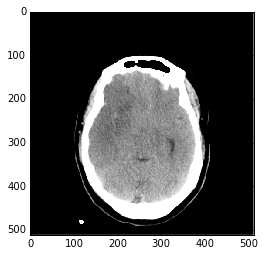

In [8]:
rootDir = 'D:\\AdamHilbert\\DNN_Classification_Project\\data\\'
datasetDir = 'MRCLEAN_CT24h'
patient = '\\0004\\CT24h\\thick\\pat0004_resampled.mhd'

path = rootDir + datasetDir + patient

# --- Read Image ---
img = sitk.ReadImage(path)

# --- Load Data ---

center = 30
width = 80

window_filter = sitk.IntensityWindowingImageFilter()
window_filter.SetWindowMinimum(center - (width / 2))
window_filter.SetWindowMaximum(center + (width / 2))
window_filter.SetOutputMinimum(0)
window_filter.SetOutputMaximum(255)

img_data = sitk.GetArrayFromImage(img)

img_plot = sitk.GetArrayFromImage(window_filter.Execute(img))
plt.imshow(img_plot[13,:,:], cmap='gray', interpolation='none')

# Testing SkullStripping with 2D connected-component analysis ##

In [9]:
import skullStripping2D as ss

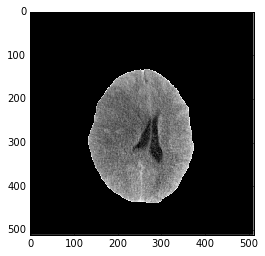

In [10]:
stripped = ss.skullstripping(img_data[5:27])

plt.imshow(stripped[13,:,:], cmap='gray', interpolation='none')

In [15]:
# --- Save image ---
img_new = sitk.GetImageFromArray(stripped.astype(int))
patient = '\\0004\\CT24h\\thick\\ct24h_skullstripped.mhd'

path = rootDir + datasetDir + patient

sitk.WriteImage(img_new, path)

# Operations run through all data #

## Skull stripping original images

In [1]:
"""
Computes the skull stripping of all the original data in the dataset.
Original images are already resampled to 30 slices in depth.
"""

import skullStripping2D as ss
import os
import SimpleITK as sitk
import numpy as np

data_dir = 'D:\\AdamHilbert\\DNN_Classification_Project\\data\\CT24h_Datasets\\RigidAligned_256x256x30\\'
new_data_dir = 'D:\\AdamHilbert\\DNN_Classification_Project\\data\\CT24h_Datasets\\RigidAligned_Skullstripped_256x256x30\\'
#images_root_sub = 'MRCLEAN_CT24h\\'
#image_sub = '\CT24h\\thick\\'

# --- Retrieve all patients we have images from ---
patients = [name.zfill(4) for name in os.listdir('D:\\AdamHilbert\\DNN_Classification_Project\\data\\MRCLEAN_CT24h\\')
                                    if os.path.isdir(
                            os.path.join('D:\\AdamHilbert\\DNN_Classification_Project\\data\\MRCLEAN_CT24h\\', name))]

for patient in patients: 
    filename = patient.zfill(4) + '.mhd'
    fullpath = data_dir + filename

    if(not os.path.isfile( new_data_dir + filename )):    
        # --- Read Image ---
        image = sitk.ReadImage(fullpath)

        # --- Load Data ---
        img_data = sitk.GetArrayFromImage(image)

        # --- Skullstripping ---
        data_new = ss.skullstripping(img_data)

        # --- Save image ---
        img_new = sitk.GetImageFromArray(data_new.astype(int))
        img_new.SetSpacing(image.GetSpacing())

        sitk.WriteImage(img_new, new_data_dir + filename)

    print(patient + ' done.')

0001 done.


skullStripping2D.py:100: RuntimeWarning: invalid value encountered in true_divide
  mean_int.append(np.true_divide(img_compi.sum(),(img_compi!=0).sum()))


0002 done.
0004 done.
0005 done.
0006 done.
0008 done.
0010 done.
0011 done.
0012 done.
0013 done.
0014 done.
0015 done.
0016 done.
0017 done.
0018 done.
0019 done.
0021 done.
0023 done.
0024 done.
0025 done.
0026 done.
0028 done.
0029 done.
0030 done.
0031 done.
0032 done.
0033 done.
0034 done.
0037 done.
0039 done.
0043 done.
0044 done.
0045 done.
0046 done.
0048 done.
0049 done.
0050 done.
0051 done.
0052 done.
0053 done.
0054 done.
0056 done.
0058 done.
0059 done.
0060 done.
0061 done.
0063 done.
0065 done.
0067 done.
0068 done.
0069 done.
0071 done.
0072 done.
0074 done.
0076 done.
0078 done.
0080 done.
0081 done.
0085 done.
0087 done.
0091 done.
0092 done.
0093 done.
0095 done.
0096 done.
0097 done.
0099 done.
0100 done.
0102 done.
0104 done.
0105 done.
0106 done.
0111 done.
0112 done.
0114 done.
0115 done.
0118 done.
0119 done.
0120 done.
0122 done.
0123 done.
0124 done.
0125 done.
0127 done.
0128 done.
0129 done.
0130 done.
0132 done.
0133 done.
0134 done.
0135 done.
0136 done.

RuntimeError: Exception thrown in SimpleITK ReadImage: ..\..\..\..\..\SimpleITK\Code\IO\src\sitkImageReaderBase.cxx:71:
sitk::ERROR: The file "D:\AdamHilbert\DNN_Classification_Project\data\CT24h_Datasets\RigidAligned_256x256x30\RigidAligned.mhd" does not exist.

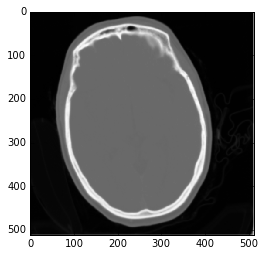

In [10]:
plt.imshow(img_data[13,:,:], cmap='gray', interpolation='none')

## Skull stripping registered images

In [12]:
import skullStripping2D as ss
import os
import SimpleITK as sitk
import numpy as np

data_dir = 'D:\\AdamHilbert\\DNN_Classification_Project\\data\\'
images_root_sub = 'MRCLEAN_CT24h\\'
image_sub = '\CT24h\\thick\\alignedRigid\\'

# --- Retrieve all patients we have images from ---
patients = [name.zfill(4) for name in os.listdir(data_dir + images_root_sub)
                if os.path.isdir(os.path.join(data_dir + images_root_sub, name))]

#for patient in patients:
patient = patients[0]
# == Original ==
filename = 'result.mhd'
fullpath = data_dir + images_root_sub + patient + image_sub + filename

# --- Read Image ---
image = sitk.ReadImage(fullpath)

# --- Load Data ---
img_data = sitk.GetArrayFromImage(image)

# --- Skullstripping ---
data_new = ss.skullstripping(img_data)

# --- Save image ---
img_new = sitk.GetImageFromArray(data_new)
newFileName = 'ct24h_registered_skullstripped.mhd'

sitk.WriteImage(img_new, data_dir + images_root_sub + patient + image_sub + newFileName)

# == Mirrored ==
filename = 'result2.mhd'
fullpath = data_dir + images_root_sub + patient + image_sub + filename

# --- Read Image ---
image = sitk.ReadImage(fullpath)

# --- Load Data ---
img_data = sitk.GetArrayFromImage(image)

# --- Skullstripping ---
data_new = ss.skullstripping(img_data)

# --- Save image ---
img_new = sitk.GetImageFromArray(data_new)
newFileName = 'ct24h_registered_skullstripped_2.mhd'

sitk.WriteImage(img_new, data_dir + images_root_sub + patient + image_sub + newFileName)

    

skullStripping2D.py:99: RuntimeWarning: invalid value encountered in true_divide
  mean_int.append(np.true_divide(img_compi.sum(),(img_compi!=0).sum()))


# RFNN utils testing

## 2D basis functions

In [11]:
import numpy as np
from scipy.ndimage.filters import convolve1d as conv
import matplotlib.pyplot as plt
%pylab inline


def init_basis_hermite1(kernel, sigmas, bases):
    nrBasis = 15
    hermiteBasis = np.empty( (np.int(np.shape(sigmas)[0]), np.int(nrBasis), np.int(kernel), np.int(kernel)) )
    
    for i, sigma in enumerate(sigmas):
        x = np.arange(-np.int(kernel-1/2), np.int(kernel-1/2)+1, dtype=np.float)
        impulse = np.zeros( (kernel, kernel) )
        impulse[np.int((kernel-1)/2),np.int((kernel-1)/2)] = 1.0
        
        g = 1.0/(np.sqrt(2*np.pi)*sigma)*np.exp(np.square(x)/(-2*np.square(sigma)))
        g = g/g.sum()
        g1 = sigma * -(x/ np.square(sigma)) * g
        g2 = np.square(sigma) * ( (np.square(x)-np.power(sigma,2)) / np.power(sigma,4)) * g
        g3 = np.power(sigma,3) * -( (np.power(x,3) - 3 * x * np.square(sigma)) / np.power(sigma,6)) * g
        g4 = np.power(sigma,4) * ( ( (np.power(x,4) - 6 *  np.square(x) * np.square(sigma) + 3 * np.power(sigma,4)) / np.power(sigma,8) ) ) * g
        gauss0x = conv(impulse, g, axis=1)
        gauss0y = conv(impulse, g, axis=0)
        gauss1x = conv(impulse, g1, axis=1)
        gauss1y = conv(impulse, g1, axis=0)
        gauss2x = conv(impulse, g2, axis=1)
        gauss0 = conv(gauss0x, g, axis=0)
        
        hermiteBasis[i,0,:,:] = gauss0                                  # g
        hermiteBasis[i,1,:,:] = conv(gauss0y, g1, axis=1) # g_x
        hermiteBasis[i,2,:,:] = conv(gauss0x, g1, axis=0) # g_y
        hermiteBasis[i,3,:,:] = conv(gauss0y, g2, axis=1) # g_xx
        hermiteBasis[i,4,:,:] = conv(gauss0x, g2, axis=0) # g_yy
        hermiteBasis[i,5,:,:] = conv(gauss1x, g1, axis=0) # g_xy
        hermiteBasis[i,6,:,:] = conv(gauss0y, g3, axis=1) # g_xxx
        hermiteBasis[i,7,:,:] = conv(gauss0x, g3, axis=0) # g_yyy
        hermiteBasis[i,8,:,:] = conv(gauss1y, g2, axis=1) # g_xxy
        hermiteBasis[i,9,:,:] = conv(gauss1x, g2, axis=0) # g_yyx
        hermiteBasis[i,10,:,:] = conv(gauss0y, g4, axis=1) # g_xxxx
        hermiteBasis[i,11,:,:] = conv(gauss0x, g4, axis=0) # g_yyyy
        hermiteBasis[i,12,:,:] = conv(gauss1y, g3, axis=1) # g_xxxy
        hermiteBasis[i,13,:,:] = conv(gauss1x, g3, axis=0) # g_yyyx
        hermiteBasis[i,14,:,:] = conv(gauss2x, g2, axis=0) # g_yyxx

    return hermiteBasis[:,0:bases,:,:]


def init_basis_hermite2(kernel, theta, sigmas, bases):
    angle = theta*np.pi/180
    orients = np.int(360/theta)
    hermiteBasis = np.empty( (np.int(np.shape(sigmas)[0]), 1+4*orients, np.int(kernel), np.int(kernel)) )
    for i, sigma in enumerate(sigmas):
        x = np.arange(-(np.int(kernel-1))/2, (np.int(kernel-1))/2+1, dtype=np.float)
        impulse = np.zeros( (np.int(kernel), np.int(kernel)) )
        impulse[(np.int(kernel-1))/2,(np.int(kernel-1))/2] = 1.0

        g = 1.0/(np.sqrt(2*np.pi)*sigma)*np.exp(np.square(x)/(-2*np.square(sigma)))
        g = g/g.sum()
        g1 = sigma * -(x/ np.square(sigma)) * g
        g2 = np.square(sigma) * ( (np.square(x)-np.power(sigma,2)) / np.power(sigma,4)) * g
        g3 = np.power(sigma,3) * -( (np.power(x,3) - 3 * x * np.square(sigma)) / np.power(sigma,6)) * g
        g4 = np.power(sigma,4) * ( ( (np.power(x,4) - 6 *  np.square(x) * np.square(sigma) + 3 * np.power(sigma,4)) / np.power(sigma,8) ) ) * g
        gauss0x = filters.convolve1d(impulse, g, axis=1)
        gauss0y = filters.convolve1d(impulse, g, axis=0)
        gauss1x = filters.convolve1d(impulse, g1, axis=1)
        gauss1y = filters.convolve1d(impulse, g1, axis=0)
        gauss2x = filters.convolve1d(impulse, g2, axis=1)
        gauss0 = filters.convolve1d(gauss0x, g, axis=0)

        hermiteBasis[i,0,:,:] = gauss0       # g
            
        for t in range(orients): # g_x g_y
            hermiteBasis[i,1+t,:,:] = np.cos(t*angle)*filters.convolve1d(gauss0y, g1, axis=1) \
                                        + np.sin(t*angle)*filters.convolve1d(gauss0x, g1, axis=0) 
                
        for t in range(orients): # g_xx g_xy g_yy
            hermiteBasis[i,1+orients+t,:,:] = \
                np.power(np.cos(t*angle),2)*filters.convolve1d(gauss0y, g2, axis=1) \
                - 2*np.cos(t*angle)*np.sin(t*angle)*filters.convolve1d(gauss1x, g1, axis=0) \
                + np.power(np.sin(t*angle),2)*filters.convolve1d(gauss0x, g2, axis=0) 
                
        for t in range(orients): # g_xxx g_xxy g_yyx g_yyy
            hermiteBasis[i,2*orients+t,:,:] = \
                np.power(np.cos(t*angle),3)*filters.convolve1d(gauss0y, g3, axis=1) \
                -3*np.power(np.cos(t*angle),2)*np.sin(t*angle)*filters.convolve1d(gauss1y, g2, axis=1) \
                +3*np.cos(t*angle)*np.power(np.sin(t*angle),2)*filters.convolve1d(gauss1x, g2, axis=0) \
                -np.power(np.sin(t*angle),3)*filters.convolve1d(gauss0x, g3, axis=0) 

#            hermiteBasis[i,4,:,:] = filters.convolve1d(gauss0y, g4, axis=1) # g_xxxx
#            hermiteBasis[i,11,:,:] = filters.convolve1d(gauss0x, g4, axis=0) # g_yyyy
#            hermiteBasis[i,12,:,:] = filters.convolve1d(gauss1y, g3, axis=1) # g_xxxy
#            hermiteBasis[i,13,:,:] = filters.convolve1d(gauss1x, g3, axis=0) # g_yyyx
#            hermiteBasis[i,14,:,:] = filters.convolve1d(gauss2x, g2, axis=0) # g_yyxx

    return hermiteBasis[:,0:1+bases*orients,:,:]

def init_basis_hermite3D(kernel, sigmas, bases):
    nrBasis = 35
    hermiteBasis = np.empty( (np.int(np.shape(sigmas)[0]), np.int(nrBasis), np.int(kernel), np.int(kernel), np.int(kernel)) )

    x = np.arange(-np.int((kernel-1)/2), np.int((kernel-1)/2)+1, dtype=np.float)
    impulse = np.zeros( (kernel, kernel, kernel) )
    impulse[np.int((kernel-1)/2), np.int((kernel-1)/2), np.int((kernel-1)/2)] = 1.0

    for i, sigma in enumerate(sigmas):
        g = 1.0/(np.sqrt(2*np.pi)*sigma)*np.exp(np.square(x)/(-2*np.square(sigma)))
        g = g/g.sum()
        g1 = sigma * -(x/ np.square(sigma)) * g
        g2 = np.square(sigma) * ( (np.square(x)-np.power(sigma,2)) / np.power(sigma,4)) * g
        g3 = np.power(sigma,3) * -( (np.power(x,3) - 3 * x * np.square(sigma)) / np.power(sigma,6)) * g
        g4 = np.power(sigma,4) * ( ( (np.power(x,4) - 6 *  np.square(x) * np.square(sigma) + 3 * np.power(sigma,4)) / np.power(sigma,8) ) ) * g

        # 0. order: g
        gauss0 = conv(conv(conv(impulse, g, axis=0), g, axis=1), g, axis=2)

        # 1. order: g_z, g_x, g_y
        gauss1z_ = conv(conv(conv(impulse, g, axis=0), g, axis=1), g1, axis=2)
        gauss1x_ = conv(conv(conv(impulse, g, axis=0), g, axis=2), g1, axis=1)
        gauss1y_ = conv(conv(conv(impulse, g, axis=1), g, axis=2), g1, axis=0)

        # 2. order: g_xx, g_yy, g_zz, 
        #		   g_xy, g_xz, g_zy
        gauss2xx_ = conv(conv(conv(impulse, g, axis=0), g, axis=2), g2, axis=1)
        gauss2yy_ = conv(conv(conv(impulse, g, axis=1), g, axis=2), g2, axis=0)
        gauss2zz_ = conv(conv(conv(impulse, g, axis=0), g, axis=1), g2, axis=2)

        gauss2xy_ = conv(conv(conv(impulse, g, axis=2), g1, axis=1), g1, axis=0)
        gauss2xz_ = conv(conv(conv(impulse, g, axis=0), g1, axis=1), g1, axis=2)
        gauss2zy_ = conv(conv(conv(impulse, g, axis=1), g1, axis=2), g1, axis=0)

        # 3. order: g_xxx, g_yyy, g_zzz
        #		   g_xxy, g_xxz, g_xyy, g_xzz, g_yyz, g_yzz, g_xyz
        gauss3xxx_ = conv(conv(conv(impulse, g, axis=0), g, axis=2), g3, axis=1)
        gauss3yyy_ = conv(conv(conv(impulse, g, axis=1), g, axis=2), g3, axis=0)
        gauss3zzz_ = conv(conv(conv(impulse, g, axis=0), g, axis=1), g3, axis=2)

        gauss3xxy_ = conv(conv(conv(impulse, g, axis=2), g1, axis=0), g2, axis=1)
        gauss3xxz_ = conv(conv(conv(impulse, g, axis=0), g1, axis=2), g2, axis=1)
        gauss3xyy_ = conv(conv(conv(impulse, g, axis=2), g1, axis=1), g2, axis=1)
        gauss3xzz_ = conv(conv(conv(impulse, g, axis=0), g1, axis=1), g2, axis=2)
        gauss3yyz_ = conv(conv(conv(impulse, g, axis=1), g1, axis=2), g2, axis=0)
        gauss3yzz_ = conv(conv(conv(impulse, g, axis=1), g1, axis=0), g2, axis=2)
        gauss3xyz_ = conv(conv(conv(impulse, g1, axis=1), g1, axis=0), g1, axis=2)

        # 4. order: g_xxxx, g_yyyy, g_zzzz, 
        #		   g_xxxy, g_xxxz, g_yyyx, g_yyyz, g_zzzx, g_zzzy, 
        #		   g_xxyy, g_xxzz, g_xxyz, g_xyyz, g_yyzz, g_xzzy,
        gauss4xxxx_ = conv(conv(conv(impulse, g, axis=0), g, axis=2), g4, axis=1)
        gauss4yyyy_ = conv(conv(conv(impulse, g, axis=1), g, axis=2), g4, axis=0)
        gauss4zzzz_ = conv(conv(conv(impulse, g, axis=0), g, axis=1), g4, axis=2)

        gauss4xxxy_ = conv(conv(conv(impulse, g, axis=2), g1, axis=0), g3, axis=1)
        gauss4xxxz_ = conv(conv(conv(impulse, g, axis=0), g1, axis=2), g3, axis=1)
        gauss4yyyx_ = conv(conv(conv(impulse, g, axis=2), g1, axis=1), g3, axis=0)
        gauss4yyyz_ = conv(conv(conv(impulse, g, axis=1), g1, axis=2), g3, axis=0)
        gauss4zzzx_ = conv(conv(conv(impulse, g, axis=0), g1, axis=1), g3, axis=2)
        gauss4zzzy_ = conv(conv(conv(impulse, g, axis=1), g1, axis=0), g3, axis=2)

        gauss4xxyy_ = conv(conv(conv(impulse, g, axis=2), g2, axis=0), g2, axis=1)
        gauss4xxzz_ = conv(conv(conv(impulse, g, axis=0), g2, axis=2), g2, axis=1)
        gauss4xxyz_ = conv(conv(conv(impulse, g1, axis=0), g1, axis=2), g2, axis=1)
        gauss4xyyz_ = conv(conv(conv(impulse, g1, axis=1), g1, axis=2), g2, axis=0)
        gauss4yyzz_ = conv(conv(conv(impulse, g, axis=1), g2, axis=0), g2, axis=2)
        gauss4xzzy_ = conv(conv(conv(impulse, g1, axis=1), g1, axis=0), g2, axis=2)

        hermiteBasis[i,0,:,:,:] = gauss0
        hermiteBasis[i,1,:,:,:] = gauss1z_
        hermiteBasis[i,2,:,:,:] = gauss1x_
        hermiteBasis[i,3,:,:,:] = gauss1y_
        hermiteBasis[i,4,:,:,:] = gauss2xx_
        hermiteBasis[i,5,:,:,:] = gauss2yy_
        hermiteBasis[i,6,:,:,:] = gauss2zz_
        hermiteBasis[i,7,:,:,:] = gauss2xy_
        hermiteBasis[i,8,:,:,:] = gauss2xz_
        hermiteBasis[i,9,:,:,:] = gauss2zy_
        hermiteBasis[i,10,:,:,:] = gauss3xxx_
        hermiteBasis[i,11,:,:,:] = gauss3yyy_
        hermiteBasis[i,12,:,:,:] = gauss3zzz_
        hermiteBasis[i,13,:,:,:] = gauss3xxy_
        hermiteBasis[i,14,:,:,:] = gauss3xxz_
        hermiteBasis[i,15,:,:,:] = gauss3xyy_
        hermiteBasis[i,16,:,:,:] = gauss3xzz_
        hermiteBasis[i,17,:,:,:] = gauss3yyz_
        hermiteBasis[i,18,:,:,:] = gauss3yzz_
        hermiteBasis[i,19,:,:,:] = gauss3xyz_
        hermiteBasis[i,20,:,:,:] = gauss4xxxx_
        hermiteBasis[i,21,:,:,:] = gauss4yyyy_
        hermiteBasis[i,22,:,:,:] = gauss4zzzz_
        hermiteBasis[i,23,:,:,:] = gauss4xxxy_
        hermiteBasis[i,24,:,:,:] = gauss4xxxz_
        hermiteBasis[i,25,:,:,:] = gauss4yyyx_
        hermiteBasis[i,26,:,:,:] = gauss4yyyz_
        hermiteBasis[i,27,:,:,:] = gauss4zzzx_
        hermiteBasis[i,28,:,:,:] = gauss4zzzy_
        hermiteBasis[i,29,:,:,:] = gauss4xxyy_
        hermiteBasis[i,30,:,:,:] = gauss4xxzz_
        hermiteBasis[i,31,:,:,:] = gauss4xxyz_
        hermiteBasis[i,32,:,:,:] = gauss4xyyz_
        hermiteBasis[i,33,:,:,:] = gauss4yyzz_
        hermiteBasis[i,34,:,:,:] = gauss4xzzy_

    return hermiteBasis[:,0:bases,:,:,:]


Populating the interactive namespace from numpy and matplotlib


(3L, 25L, 21L, 21L)
(3L, 15L, 11L, 11L)


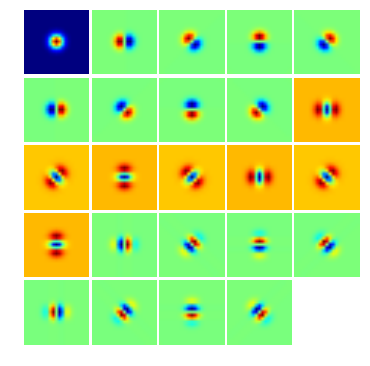

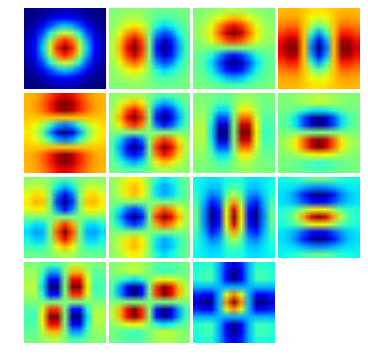

In [12]:
nrBasis = 3
theta = 45
orients = np.int(360/theta)
bases = init_basis_hermite2(21, theta, [1.5, 1.0, 1.0], nrBasis)
print(np.shape(bases))
f = plt.figure()
f.set_figheight(6)
f.set_figwidth(6)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1,1+nrBasis*orients):
    ax = f.add_subplot(5,5,i)
    ax.imshow(bases[0,i-1,:,:], cmap='jet')
    ax.set_axis_off()

nrBasis = 15
bases = init_basis_hermite1(11, [2.0, 1.0, 1.0], nrBasis)
print(np.shape(bases))
f = plt.figure()
f.set_figheight(6)
f.set_figwidth(6)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(1,1+nrBasis):
    ax = f.add_subplot(4,4,i)
    ax.imshow(bases[0,i-1,:,:], cmap='jet')
    ax.set_axis_off()



In [21]:
nrBasis = 10
bases = init_basis_hermite3D(11, [1.5, 1.0], nrBasis)
alphas = np.random.uniform(-1.0, 1.0, (16, 3, nrBasis))
print(np.shape(alphas))
print(np.shape(bases))
alphas = np.transpose(alphas[:,:,None,:,None,None,None])
bases = np.transpose(bases[None,None,i,:,:,:,:])
print(np.shape(alphas))
print(np.shape(bases))

kernels = np.sum(alphas * bases, axis=3)
print(np.shape(kernels))

 

(16L, 3L, 10L)
(2L, 10L, 11L, 11L, 11L)
(1L, 1L, 1L, 10L, 1L, 3L, 16L)
(11L, 11L, 11L, 10L, 2L, 1L, 1L)
(11L, 11L, 11L, 2L, 3L, 16L)


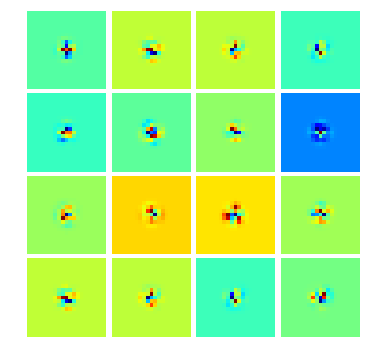

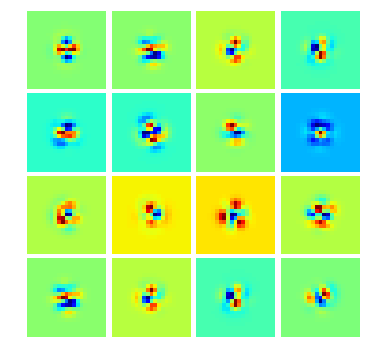

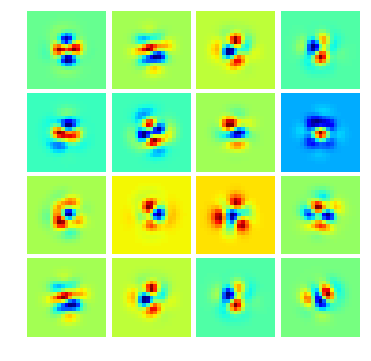

In [119]:
f, axarr = plt.subplots(4, 4)
f.set_figheight(6)
f.set_figwidth(6)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(4):
    for j in range(4):
        axarr[j, i].imshow(kernels[:,:,0,0,i*3+j], cmap='jet')
        axarr[j, i].set_axis_off()
        
f, axarr = plt.subplots(4, 4)
f.set_figheight(6)
f.set_figwidth(6)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(4):
    for j in range(4):
        axarr[j, i].imshow(kernels[:,:,1,0,i*3+j], cmap='jet')
        axarr[j, i].set_axis_off()
        
f, axarr = plt.subplots(4, 4)
f.set_figheight(6)
f.set_figwidth(6)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(4):
    for j in range(4):
        axarr[j, i].imshow(kernels[:,:,2,0,i*3+j], cmap='jet')
        axarr[j, i].set_axis_off()

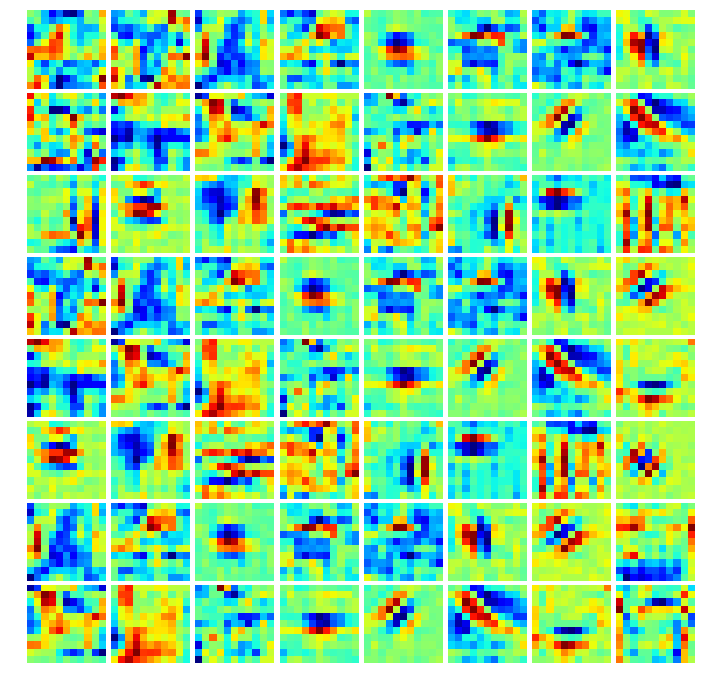

In [250]:
f, axarr = plt.subplots(8, 8)
f.set_figheight(12)
f.set_figwidth(12)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(8):
    for j in range(8):
        axarr[j, i].imshow(kernels_final[i*3+j], cmap='jet')
        axarr[j, i].set_axis_off()

# SVM test

In [19]:
from __future__ import division
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
import sklearn.svm as svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# --------- Load data ----------
n_classes = 2

root = 'D:\\AdamHilbert\\DNN_Classification_Project\\data\\CT24h_Datasets\\'
image_dir = root + 'Normalized_Skullstripped_128x128x22+Flipped'
label_filename = 'D:\\AdamHilbert\\DNN_Classification_Project\\data\\MRCLEAN\\MRCLEAN_MRSDICH.xlsx'

dataset = read_dataset(image_dir, label_filename)

fpr = np.zeros((200))
tpr = np.zeros((200))
tr = np.linspace(0,1,200)
acc = 0
iters = 20

for k in range(iters):
    X_train, labels_train = dataset.Training.next_batch(dataset.Training.num_examples)
    X_test, labels_test = dataset.Validation.next_batch(dataset.Validation.num_examples)

    X_train = X_train.reshape(dataset.Training.num_examples, -1)
    X_test = X_test.reshape(dataset.Validation.num_examples, -1)

    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=np.random.RandomState(0))).fit(X_train, labels_train)
    Y = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)

#    for i in range(n_classes):
#        yi = Y[np.where(labels_test==i)[0]]
#        acc = np.sum(yi==i)/np.sum(labels_test==i)
#        print('Accuracy on class \'%s\': %s' %(i,acc))

    acc += np.sum(Y==labels_test)/Y.shape[0] / iters

    # Compute ROC curve and ROC area for each class

    for j in range(200):
        tp = 0
        fp = 0
        for i in range(np.shape(y_score)[0]):
            if y_score[i][0] >= tr[j]:
                if labels_test[i][0] == 1:
                    tp += 1
                else:
                    fp += 1
        tpr[j] += tp/np.sum(labels_test[:,0]==1) /iters
        fpr[j] += fp/np.sum(labels_test[:,1]==1) /iters

roc_auc = auc(fpr, tpr)

print('Multi-class Accuracy: %s' %acc)

NameError: name 'read_dataset' is not defined

Multi-class Accuracy and AUC for  : 1.27011494253, 0.660270091354


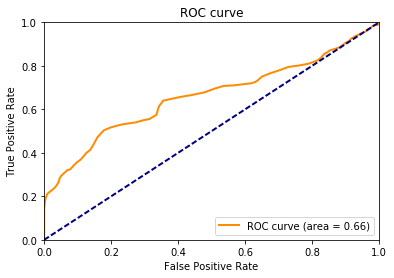

In [77]:
print('Multi-class Accuracy and AUC for ' + ' : %s, %s' %(acc,roc_auc))
np.save('./Statistics/tpr_Norm_Skullstripped_Flipped.npy', tpr)
np.save('./Statistics/fpr_Norm_Skullstripped_Flipped.npy', fpr)
    
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# ROC

In [7]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls


def roc_curve(fpr, tpr, index1, y1, fpr2, tpr2, index2, y2):
    trace11= Scatter(
        x = fpr,
        y = tpr,
        line = dict(
            color = 'red',
            width = 2 ),
        name = '2D (AUC = %0.2f)' % (auc)
    )
    trace12= Scatter(
        x = fpr[index1],
        y = tpr[index1],
        line = dict(
            color = 'red'),
        mode = 'markers',
        showlegend = False
    )
    trace21= Scatter(
        x = fpr2,
        y = tpr2,
        line = dict(
            color = 'green',
            width = 2 ),
        name = '3D (AUC = %0.2f)' % (auc2)
    )
    trace22= Scatter(
        x = fpr2[index2],
        y = tpr2[index2],
        line = dict(
            color = 'green'),
        mode = 'markers',
        showlegend = False
    )
    trace3= Scatter(
        x = [0,1],
        y = [0,1],
        name = 'Random',
        mode = 'lines',
        line = dict(
            color = 'navy',
            dash = 'dash',
            width = 1 ),
        showlegend = False
    )

    layout1 = dict(
                    autosize=False,
                    width=600,
                    height=600,
                    xaxis = dict(title = 'False Positive Rate (FPR)'),
                    yaxis = dict(title = 'True Positive Rate (TPR)'),
                    legend = dict(
                        orientation="h",
                        xanchor = "center",
                        x=0.5,
                        y=1.2),
                    annotations=[
                        dict(
                            x=fpr[index1],
                            y=tpr[index1],
                            xref='x',
                            yref='y',
                            text='J=%0.2f' %y1,
                            showarrow=True,
                            borderwidth=1,
                            arrowhead=0,
                            arrowsize=1,
                            bordercolor= 'red',
                            arrowcolor = 'red',
                            ax=0,
                            ay=-20,
                            bgcolor='lightgray'
                        ),
                        dict(
                            x=fpr2[index2],
                            y=tpr2[index2],
                            xref='x',
                            yref='y',
                            text='J=%0.2f' %y2,
                            showarrow=True,
                            borderwidth=1,
                            arrowhead=0,
                            arrowsize=1,
                            bordercolor= 'green',
                            arrowcolor = 'green',
                            ax=0,
                            ay=-20,
                            bgcolor='lightgray'
                        )
                    ]
                  )

    data1 = Data([trace11, trace12, trace21, trace22, trace3])
    fig = dict(data=data1, layout=layout1)

    return fig

In [8]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

py.sign_in('hilbysfe', '9FK3uiXFdhGzfJQzkcsK')

# -------------------- ORIGINAL DATASET -------------------
tpr = np.load('./Statistics/CTNET/2Dfinal/Normalized_Resampled_128x128x30/tpr.npy')
fpr = np.load('./Statistics/CTNET/2Dfinal/Normalized_Resampled_128x128x30/fpr.npy')
auc = np.load('./Statistics/CTNET/2Dfinal/Normalized_Resampled_128x128x30/auc.npy')
            
y1 = 0
index1 = 0
for i in range(len(tpr)):
    if tpr[i]+(1-fpr[i])-1 > y1:
        y1=tpr[i]+(1-fpr[i])-1
        index1 = i
        
tpr2 = np.load('./Statistics/CTNET/3Dfinal/Normalized_Resampled_128x128x30/tpr.npy')
fpr2 = np.load('./Statistics/CTNET/3Dfinal/Normalized_Resampled_128x128x30/fpr.npy')
auc2 = np.load('./Statistics/CTNET/3Dfinal/Normalized_Resampled_128x128x30/auc.npy')
        
y2 = 0
index2 = 0
for i in range(len(tpr2)):
    if tpr2[i]+(1-fpr2[i])-1 > y2:
        y2=tpr2[i]+(1-fpr2[i])-1
        index2 = i
        
fig = roc_curve(fpr, tpr, index1, y1, fpr2, tpr2, index2, y2)
    
py.iplot(fig)


In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

py.sign_in('hilbysfe', '9FK3uiXFdhGzfJQzkcsK')

# -------------------- AUGMENTED3 DATASET -------------------
tpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented3_linear_tpr.npy')
fpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented3_linear_fpr.npy')
auc = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented3_linear_auc.npy')
            
y1 = 0
index1 = 0
for i in range(len(tpr)):
    if tpr[i]+(1-fpr[i])-1 > y1:
        y1=tpr[i]+(1-fpr[i])-1
        index1 = i
        
tpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented3_linear_tpr.npy')
fpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented3_linear_fpr.npy')
auc2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented3_linear_auc.npy')
               
y2 = 0
index2 = 0
for i in range(len(tpr2)):
    if tpr2[i]+(1-fpr2[i])-1 > y2:
        y2=tpr2[i]+(1-fpr2[i])-1
        index2 = i
        
tpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented3_linear_tpr.npy')
fpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented3_linear_fpr.npy')
auc3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented3_linear_auc.npy')
        
y3 = 0
index3 = 0
for i in range(len(tpr3)):
    if tpr3[i]+(1-fpr3[i])-1 > y3:
        y3=tpr3[i]+(1-fpr3[i])-1
        index3 = i
        
fig = roc_curve(fpr, tpr, index1, y1, fpr2, tpr2, index2, y2, fpr3, tpr3, index3, y3)
    
py.iplot(fig)

In [80]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

py.sign_in('hilbysfe', '9FK3uiXFdhGzfJQzkcsK')

# -------------------- AUGMENTED5 DATASET -------------------
tpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented5_linear_tpr.npy')
fpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented5_linear_fpr.npy')
auc = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented5_linear_auc.npy')
            
y1 = 0
index1 = 0
for i in range(len(tpr)):
    if tpr[i]+(1-fpr[i])-1 > y1:
        y1=tpr[i]+(1-fpr[i])-1
        index1 = i
        
tpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented5_linear_tpr.npy')
fpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented5_linear_fpr.npy')
auc2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented5_linear_auc.npy')
               
y2 = 0
index2 = 0
for i in range(len(tpr2)):
    if tpr2[i]+(1-fpr2[i])-1 > y2:
        y2=tpr2[i]+(1-fpr2[i])-1
        index2 = i
        
tpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented5_linear_tpr.npy')
fpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented5_linear_fpr.npy')
auc3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented5_linear_auc.npy')
        
y3 = 0
index3 = 0
for i in range(len(tpr3)):
    if tpr3[i]+(1-fpr3[i])-1 > y3:
        y3=tpr3[i]+(1-fpr3[i])-1
        index3 = i
        
fig = roc_curve(fpr, tpr, index1, y1, fpr2, tpr2, index2, y2, fpr3, tpr3, index3, y3)
    
py.iplot(fig)

In [25]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

py.sign_in('hilbysfe', 'ZdgANoYXAnH015PM4hIV')

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(18)

ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

lw = 2

# Original dataset

tpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_linear_tpr.npy')
fpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_linear_fpr.npy')
auc = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_linear_auc.npy')
                            
tpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_linear_tpr.npy')
fpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_linear_fpr.npy')
auc2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_linear_auc.npy')
               
tpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_linear_tpr.npy')
fpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_linear_fpr.npy')
auc3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_linear_auc.npy')


# Youden index
y1 = 0
index1 = 0
for i in range(len(tpr)):
    if tpr[i]+(1-fpr[i])-1 > y1:
        y1=tpr[i]+(1-fpr[i])-1
        index1 = i

y2 = 0
index2 = 0
for i in range(len(tpr2)):
    if tpr2[i]+(1-fpr2[i])-1 > y2:
        y2=tpr2[i]+(1-fpr2[i])-1
        index2 = i
        
y3 = 0
index3 = 0
for i in range(len(tpr3)):
    if tpr3[i]+(1-fpr3[i])-1 > y3:
        y3=tpr3[i]+(1-fpr3[i])-1
        index3 = i

        
ax1.set_title('Original dataset')

ax1.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Original (AUC = %0.2f, Youden = %0.2f)' % (auc, y1))
ax1.plot(fpr[index1], tpr[index1], 'o', color='darkorange')

ax1.plot(fpr2, tpr2, color='darkred',
         lw=lw, label='Aligned (AUC = %0.2f, Youden = %0.2f)' % (auc2, y2))
ax1.plot(fpr2[index2], tpr2[index2], 'o', color='darkred')

ax1.plot(fpr3, tpr3, color='darkgreen',
         lw=lw, label='Skullstripped (AUC = %0.2f, Youden = %0.2f)' % (auc3, y3))
ax1.plot(fpr3[index3], tpr3[index3], 'o', color='darkgreen')

ax1.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')


# Augmented-3

tpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented3_linear_tpr.npy')
fpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented3_linear_fpr.npy')
auc = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented3_linear_auc.npy')
                            
tpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented3_linear_tpr.npy')
fpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented3_linear_fpr.npy')
auc2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented3_linear_auc.npy')
               
tpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented3_linear_tpr.npy')
fpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented3_linear_fpr.npy')
auc3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented3_linear_auc.npy')

# Youden index
y1 = 0
index1 = 0
for i in range(len(tpr)):
    if tpr[i]+(1-fpr[i])-1 > y1:
        y1=tpr[i]+(1-fpr[i])-1
        index1 = i

y2 = 0
index2 = 0
for i in range(len(tpr2)):
    if tpr2[i]+(1-fpr2[i])-1 > y2:
        y2=tpr2[i]+(1-fpr2[i])-1
        index2 = i
        
y3 = 0
index3 = 0
for i in range(len(tpr3)):
    if tpr3[i]+(1-fpr3[i])-1 > y3:
        y3=tpr3[i]+(1-fpr3[i])-1
        index3 = i


ax2.set_title('Augmented-3')        
        
ax2.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Original (AUC = %0.2f, Youden = %0.2f)' % (auc, y1))
ax2.plot(fpr[index1], tpr[index1], 'o', color='darkorange')

ax2.plot(fpr2, tpr2, color='darkred',
         lw=lw, label='Aligned (AUC = %0.2f, Youden = %0.2f)' % (auc2, y2))
ax2.plot(fpr2[index2], tpr2[index2], 'o', color='darkred')

ax2.plot(fpr3, tpr3, color='darkgreen',
         lw=lw, label='Skullstripped (AUC = %0.2f, Youden = %0.2f)' % (auc3, y3))
ax2.plot(fpr3[index3], tpr3[index3], 'o', color='darkgreen')

ax2.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')

# Augmented-5

tpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented5_linear_tpr.npy')
fpr = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented5_linear_fpr.npy')
auc = np.load('./Statistics/SVM/Normalized_Resampled_128x128x30_augmented5_linear_auc.npy')
                            
tpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented5_linear_tpr.npy')
fpr2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented5_linear_fpr.npy')
auc2 = np.load('./Statistics/SVM/Normalized_RigidAligned_128x128x30_augmented5_linear_auc.npy')
               
tpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented5_linear_tpr.npy')
fpr3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented5_linear_fpr.npy')
auc3 = np.load('./Statistics/SVM/Normalized_Skullstripped_128x128x22_augmented5_linear_auc.npy')

# Youden index
y1 = 0
index1 = 0
for i in range(len(tpr)):
    if tpr[i]+(1-fpr[i])-1 > y1:
        y1=tpr[i]+(1-fpr[i])-1
        index1 = i

y2 = 0
index2 = 0
for i in range(len(tpr2)):
    if tpr2[i]+(1-fpr2[i])-1 > y2:
        y2=tpr2[i]+(1-fpr2[i])-1
        index2 = i
        
y3 = 0
index3 = 0
for i in range(len(tpr3)):
    if tpr3[i]+(1-fpr3[i])-1 > y3:
        y3=tpr3[i]+(1-fpr3[i])-1
        index3 = i

ax3.set_title('Augmented-5')  

ax3.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Original (AUC = %0.2f, Youden = %0.2f)' % (auc, y1))
ax3.plot(fpr[index1], tpr[index1], 'o', color='darkorange')

ax3.plot(fpr2, tpr2, color='darkred',
         lw=lw, label='Aligned (AUC = %0.2f, Youden = %0.2f)' % (auc2, y2))
ax3.plot(fpr2[index2], tpr2[index2], 'o', color='darkred')

ax3.plot(fpr3, tpr3, color='darkgreen',
         lw=lw, label='Skullstripped (AUC = %0.2f, Youden = %0.2f)' % (auc3, y3))
ax3.plot(fpr3[index3], tpr3[index3], 'o', color='darkgreen')

ax3.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.0])
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')


plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig['layout']['showlegend'] = True
py.iplot(plotly_fig, update=update)

#unique_url = py.plot_mpl(fig, filename="SVM ROC")


# Normalizing images

In [1]:
import numpy as np
import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
%pylab inline

ModuleNotFoundError: No module named 'SimpleITK'

In [19]:
root = 'D:\\AdamHilbert\\DNN_Classification_Project\\data\\CT24h_Datasets\\'
image_dir = root + 'Resampled_256x256x30\\'

filenames = [filename for filename in os.listdir(image_dir) if filename.endswith(".mhd")]
files = [sitk.ReadImage(image_dir + filename) for filename in filenames]
images = np.array([sitk.GetArrayFromImage(file) for file in files])
        
print(np.shape(images))

(712L, 22L, 128L, 128L)


In [20]:
mean_image = np.mean(images, axis=0)
print(np.shape(mean_image))
std_image = np.std(images, axis=0)
print(np.shape(std_image))

(22L, 128L, 128L)
(22L, 128L, 128L)


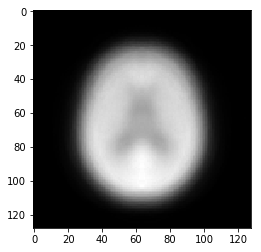

In [21]:
img = sitk.GetImageFromArray(mean_image)

center = 30
width = 80

window_filter = sitk.IntensityWindowingImageFilter()
window_filter.SetWindowMinimum(center - (width / 2))
window_filter.SetWindowMaximum(center + (width / 2))
window_filter.SetOutputMinimum(0)
window_filter.SetOutputMaximum(255)

img_data = sitk.GetArrayFromImage(img)
img_plot = sitk.GetArrayFromImage(window_filter.Execute(img))

plt.imshow(img_plot[11,:,:], cmap='gray', interpolation='none')

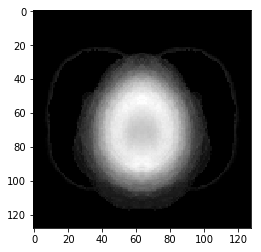

In [22]:
img = sitk.GetImageFromArray(std_image)

center = 30
width = 80

window_filter = sitk.IntensityWindowingImageFilter()
window_filter.SetWindowMinimum(center - (width / 2))
window_filter.SetWindowMaximum(center + (width / 2))
window_filter.SetOutputMinimum(0)
window_filter.SetOutputMaximum(255)

img_data = sitk.GetArrayFromImage(img)
img_plot = sitk.GetArrayFromImage(window_filter.Execute(img))

plt.imshow(img_plot[20,:,:], cmap='gray', interpolation='none')



In [23]:
def div0( a, b ):
    """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide( a, b )
        c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
    return c

centered_images = np.array(
                        [images[i,:,:,:] - mean_image for i in range(np.shape(images)[0])])
normalized_images = np.array(
                        [div0(centered_images[i,:,:,:], std_image) for i in range(np.shape(images)[0])])

In [24]:
# --- Save image ---
new_image_dir = root + 'Normalized_Skullstripped_128x128x22+Flipped\\'
os.mkdir(new_image_dir)
for i, new_data in enumerate(normalized_images):
    img_new = sitk.GetImageFromArray(new_data)
    img_new.SetSpacing(files[i].GetSpacing())
    filename = filenames[i]

    sitk.WriteImage(img_new, new_image_dir + filename)

# MIPs

In [ ]:
import os

with open(old_files) as fo:
    old_filenames = fo.readlines()
old_filenames = [x.strip("\n") for x in old_filenames]

with open(new_files) as fn:
    new_filenames = fn.readlines()
new_filenames = [x.strip("\n") for x in new_filenames]

for i in range(len(new_filenames)):
    command = "dcmdjpeg " + old_filenames[i] + " " + new_filenames[i]);
    os.system(command)

# Show filters

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

kernels_0 = np.load('/home/nicolab/dev/CT-Classification/Training/Kernels/kernel_0.npy')
alphas_0 = np.load('/home/nicolab/dev/CT-Classification/Training/Kernels/alphas_0.npy')

kernels_final = np.load('/home/nicolab/dev/CT-Classification/Training/Kernels/kernel_final.npy')
alphas_final = np.load('/home/nicolab/dev/CT-Classification/Training/Kernels/alphas_final.npy')

print(np.shape(kernels_final))

# f, axarr = plt.subplots(1,2)
# axarr[0].imshow(kernels_0[0], cmap='jet')
# axarr[1].imshow(kernels_final[0], cmap='jet')


(3, 64, 11, 11)


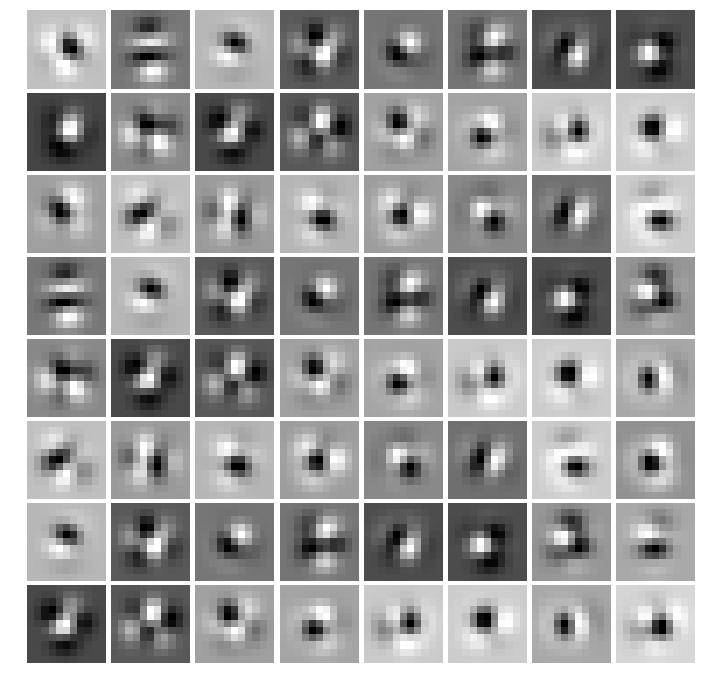

In [7]:
f, axarr = plt.subplots(8, 8)
f.set_figheight(12)
f.set_figwidth(12)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(8):
    for j in range(8):
        axarr[j, i].imshow(kernels_0[0,i*3+j], cmap='gray')
        axarr[j, i].set_axis_off()

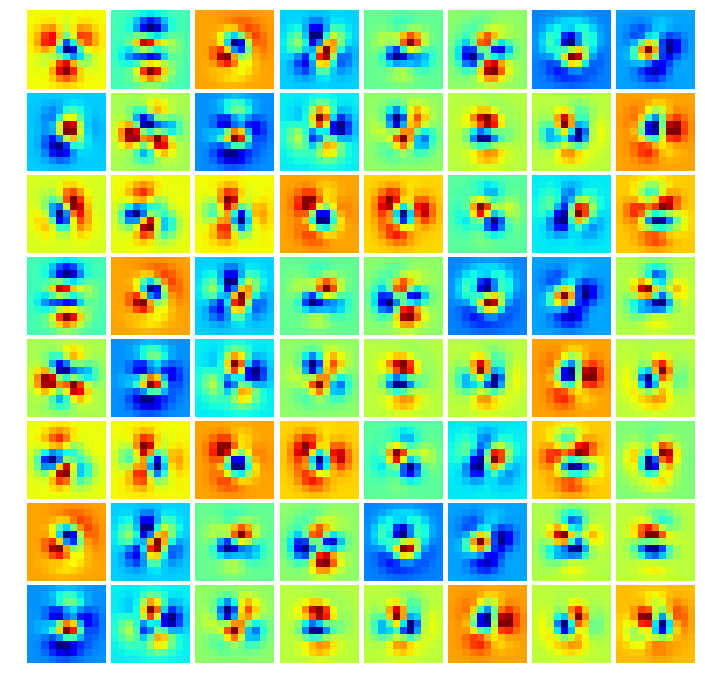

In [168]:
f, axarr = plt.subplots(8, 8)
f.set_figheight(12)
f.set_figwidth(12)
f.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(8):
    for j in range(8):
        axarr[j, i].imshow(kernels_final[0,i*3+j], cmap='jet')
        axarr[j, i].set_axis_off()

# Testing normalization

In [1]:
import numpy as np
import SimpleITK as sitk
import utils
import pickle
import matplotlib.pyplot as plt
%pylab inline

/home/nicolab/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Populating the interactive namespace from numpy and matplotlib


In [6]:
trainpath = '/home/nicolab/DATA/data_binaries/SUPERVISED/NCCT_THICK_RESAMPLED/training_points.npy'
testpath = '/home/nicolab/DATA/data_binaries/SUPERVISED/NCCT_THICK_RESAMPLED/test_points.npy'

with open(trainpath, 'rb') as handle:
    training_points = pickle.load(handle)
with open(testpath, 'rb') as handle:
    test_points = pickle.load(handle)

dataset = utils.DataSet(np.array(list(training_points.keys())), np.array(list(training_points.values())),
            np.array(list(test_points.keys())), np.array(list(test_points.values())),
            cross_validation_folds=10,
            normalize = True)


Init Dataset...
Creating folds...
Creating folds...done.
Computing mean and std image...
Computing mean and std image...done.
Init Dataset...done.


In [16]:
image_batch, label_batch = dataset.Training.next_batch(10, False)

(30, 512, 512)
[[ 0.00083315  0.00083209  0.00083241 ...,  0.00083579  0.00083335
   0.00083704]
 [ 0.00083135  0.00083061  0.00083342 ...,  0.00083181  0.00083444
   0.0008388 ]
 [ 0.00082754  0.00082972  0.00082969 ...,  0.00083055  0.00083124
   0.00083521]
 ..., 
 [ 0.00064286  0.00063165  0.00062322 ...,  0.0006101   0.00061467
   0.00063054]
 [ 0.00064145  0.00063291  0.00063121 ...,  0.00063717  0.00063608
   0.00064797]
 [ 0.00064259  0.00063217  0.00063444 ...,  0.00064902  0.00064728
   0.00065264]]


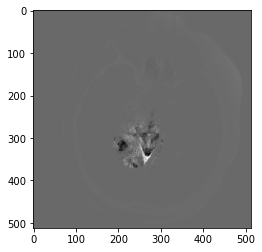

In [19]:
mean = dataset.Training._mean
std = dataset.Training._std

print(np.shape(mean))

img = sitk.GetImageFromArray(image_batch[0])

print(image_batch[0,:,:,11])

center = 0
width = 80

window_filter = sitk.IntensityWindowingImageFilter()
window_filter.SetWindowMinimum(center - (width / 2))
window_filter.SetWindowMaximum(center + (width / 2))
window_filter.SetOutputMinimum(0)
window_filter.SetOutputMaximum(255)

img_plot = sitk.GetArrayFromImage(window_filter.Execute(img))

plt.imshow(img_plot[:,:,11], cmap='gray', interpolation='none')